# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [4]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [5]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

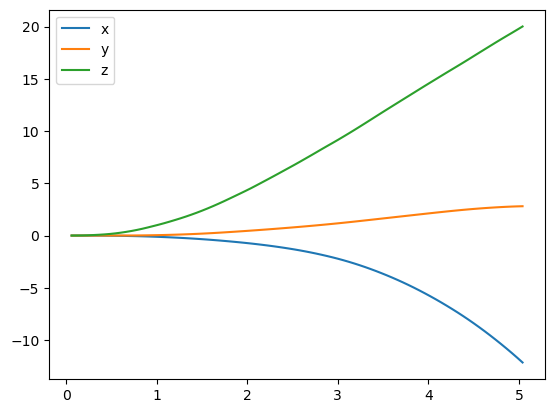

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

In [7]:
def plot3d(x, y, z, t=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if t is None:
        t = range(len(x))

    scatter = ax.scatter(x, y, z, c=t, cmap='viridis', marker='o', s=20)
    fig.colorbar(scatter, ax=ax, label='Time (s)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    max_range = max(np.max(np.abs(x)), np.max(np.abs(y)), np.max(np.abs(z)))
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)
    ax.set_zlim(0, max_range)

    plt.show()

In [8]:
import math
velo_vectors = []
for i in range(len(results['x_velocity'])):
    velo_vectors.append(math.sqrt(results['x_velocity'][i]**2 + results['y_velocity'][i]**2 + results['z_velocity'][i]**2))

In [9]:
def plot3d_velo(x,y,z, v=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if v is None:
        v = range(len(x))

    scatter = ax.scatter(x, y, z, c=v, cmap='viridis', marker='o', s=20)
    fig.colorbar(scatter, ax=ax, label='Velocity (m/s)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    max_range = max(np.max(np.abs(x)), np.max(np.abs(y)), np.max(np.abs(z)))
    
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)
    ax.set_zlim(0, max_range)
    
    plt.show()

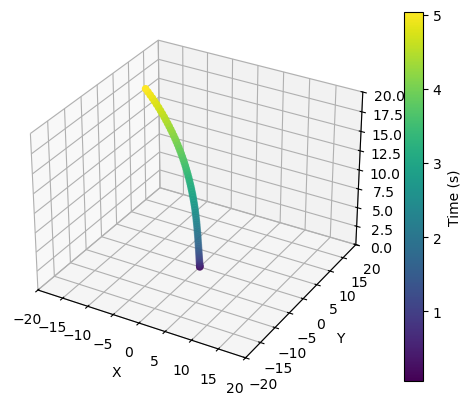

In [10]:
plot3d(results['x'], results['y'], results['z'], results['time'])

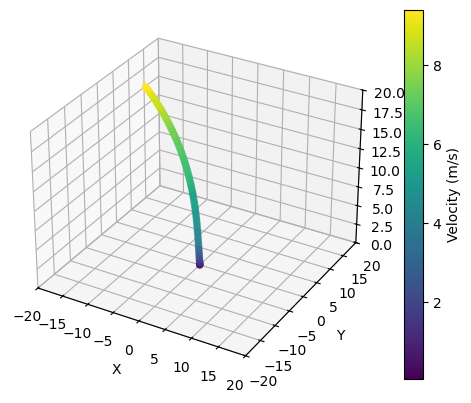

In [11]:
plot3d_velo(results['x'], results['y'], results['z'], velo_vectors)

The next code cell visualizes the velocity of the quadcopter.

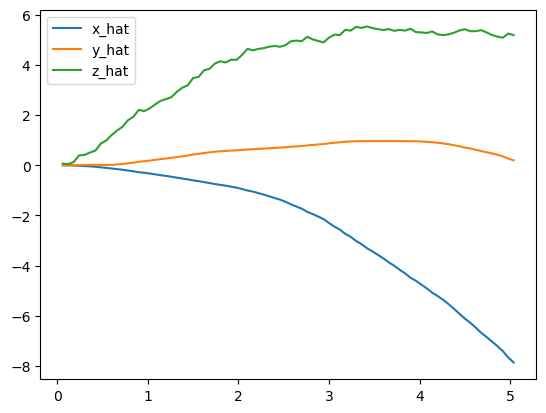

In [12]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

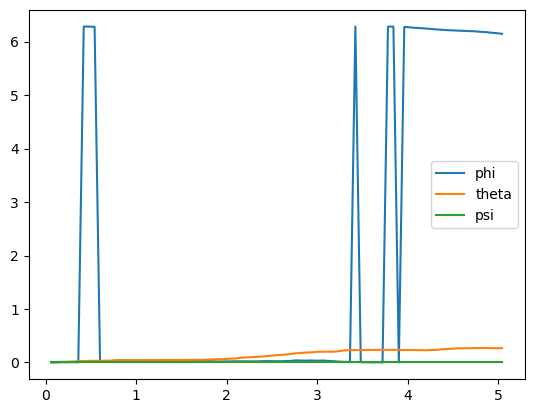

In [13]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

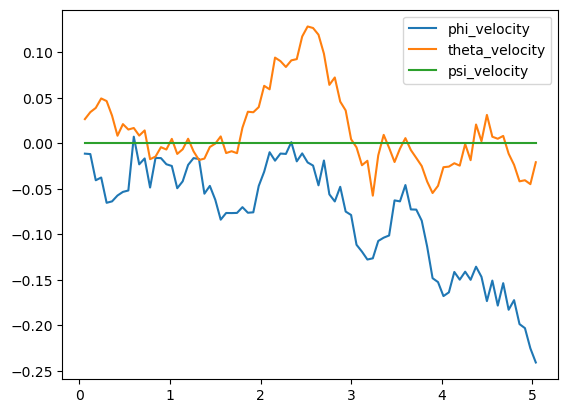

In [14]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

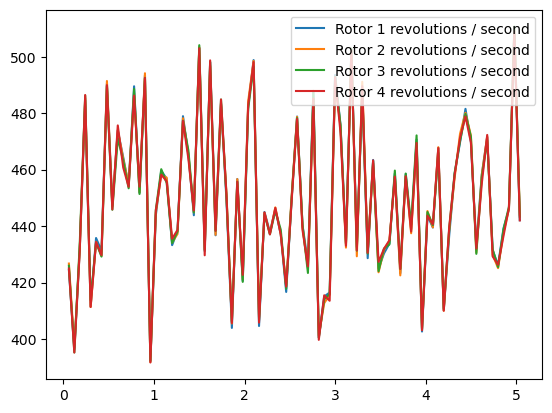

In [15]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [16]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-12.1403948    2.80772468  20.00421371   6.14623835   0.26846431
   0.        ]
[-7.85910753  0.1949859   5.18231568]
[-0.24062958 -0.02081346  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [17]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = -107.387 (best = -80.061), noise_scale = 3.225

This agent should perform very poorly on this task.  And that's where you come in!

In [18]:

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
state = agent.reset_episode()

with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act(state)
        state, reward, done = task.step(rotor_speeds)
        agent.step(reward, done)
        state = next_state
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

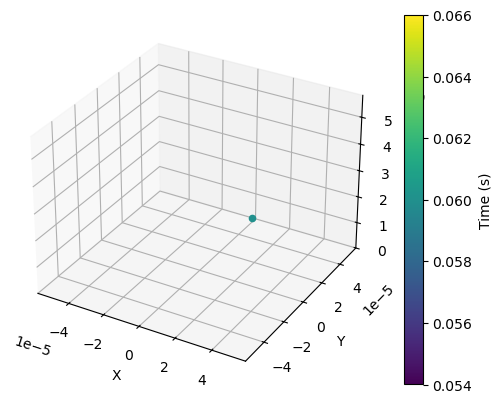

In [19]:
plot3d(results['x'], results['y'], results['z'], results['time'])

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from agents.agent import Agent
from task import Task

# Training parameters
num_episodes = 1000
target_pos = np.array([0., 0., 10.])  # Target: hover at 10m height
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # Start on ground
init_velocities = np.array([0., 0., 0.])
init_angle_velocities = np.array([0., 0., 0.])
runtime = 5.0

# Create task and agent
task = Task(init_pose=init_pose, 
            init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities,
            runtime=runtime,
            target_pos=target_pos)

agent = Agent(task, hidden_size=256, buffer_size=100000, batch_size=64,
              gamma=0.99, tau=0.001, lr_actor=1e-4, lr_critic=1e-3)

# Training metrics
episode_rewards = []
episode_scores = []
best_reward = -np.inf

print("Starting training...")
print(f"Task: Takeoff and hover at position {target_pos}")
print(f"State size: {task.state_size}, Action size: {task.action_size}")
print("="*60)

# Training loop
for i_episode in range(1, num_episodes + 1):
    state = agent.reset_episode()
    episode_reward = 0
    
    while True:
        # Select action
        action = agent.act(state, add_noise=True)
        
        # Execute action
        next_state, reward, done = task.step(action)
        
        # Store experience and learn
        agent.step_with_next_state(state, action, reward, next_state, done)
        
        episode_reward += reward
        state = next_state
        
        if done:
            break
    
    # Track metrics
    episode_rewards.append(episode_reward)
    episode_scores.append(agent.score)
    
    if episode_reward > best_reward:
        best_reward = episode_reward
    
    # Print progress
    if i_episode % 10 == 0:
        avg_reward = np.mean(episode_rewards[-10:])
        print(f"Episode {i_episode:4d} | "
              f"Reward: {episode_reward:7.2f} | "
              f"Avg(10): {avg_reward:7.2f} | "
              f"Best: {best_reward:7.2f} | "
              f"Score: {agent.score:7.2f}")
    
    sys.stdout.flush()

print("\n" + "="*60)
print("Training completed!")
print(f"Final average reward (last 100 episodes): {np.mean(episode_rewards[-100:]):.2f}")
print(f"Best episode reward: {best_reward:.2f}")

Starting training...
Task: Takeoff and hover at position [ 0.  0. 10.]
State size: 18, Action size: 4


c:\Users\Harshal\Documents\GitHub\RL-Quadcopter\RL-Quadcopter-2-master\physics_sim.py:69: RuntimeWarning: overflow encountered in square
  linear_drag = 0.5 * self.rho * self.find_body_velocity()**2 * self.areas * self.C_d
c:\Users\Harshal\Documents\GitHub\RL-Quadcopter\RL-Quadcopter-2-master\physics_sim.py:81: RuntimeWarning: invalid value encountered in matmul
  linear_forces = np.matmul(body_to_earth_frame(*list(self.pose[3:])), body_forces)


Episode   10 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode   20 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode   30 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode   40 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode   50 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode   60 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode   70 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode   80 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode   90 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode  100 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan
Episode  110 | Reward:     nan | Avg(10):     nan | Best: -999278.06 | Score:     nan


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
import matplotlib.pyplot as plt

# Plot rewards over episodes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Episode Rewards
axes[0, 0].plot(episode_rewards, alpha=0.6, linewidth=0.8, color='blue')
axes[0, 0].set_xlabel('Episode')
axes[0, 0].set_ylabel('Total Reward')
axes[0, 0].set_title('Episode Rewards Over Time')
axes[0, 0].grid(True, alpha=0.3)

# 2. Moving Average (window=50)
window = 50
if len(episode_rewards) >= window:
    moving_avg = pd.Series(episode_rewards).rolling(window=window).mean()
    axes[0, 1].plot(moving_avg, color='red', linewidth=2)
    axes[0, 1].set_xlabel('Episode')
    axes[0, 1].set_ylabel('Average Reward')
    axes[0, 1].set_title(f'Moving Average Reward (window={window})')
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'Not enough episodes for moving average',
                    ha='center', va='center', transform=axes[0, 1].transAxes)

# 3. Episode Scores (average reward per timestep)
axes[1, 0].plot(episode_scores, alpha=0.6, linewidth=0.8, color='green')
axes[1, 0].set_xlabel('Episode')
axes[1, 0].set_ylabel('Score (Avg Reward/Timestep)')
axes[1, 0].set_title('Episode Scores Over Time')
axes[1, 0].grid(True, alpha=0.3)

# 4. Reward Distribution (last 100 episodes)
last_n = min(100, len(episode_rewards))
axes[1, 1].hist(episode_rewards[-last_n:], bins=20, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Reward')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Reward Distribution (Last {last_n} Episodes)')
axes[1, 1].axvline(np.mean(episode_rewards[-last_n:]), color='red', 
                   linestyle='--', linewidth=2, label=f'Mean: {np.mean(episode_rewards[-last_n:]):.2f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Training Statistics:")
print("="*50)
print(f"Total Episodes: {len(episode_rewards)}")
print(f"Best Reward: {max(episode_rewards):.2f}")
print(f"Worst Reward: {min(episode_rewards):.2f}")
print(f"Mean Reward: {np.mean(episode_rewards):.2f}")
print(f"Std Reward: {np.std(episode_rewards):.2f}")
if len(episode_rewards) >= 100:
    print(f"\nLast 100 Episodes:")
    print(f"  Mean: {np.mean(episode_rewards[-100:]):.2f}")
    print(f"  Std: {np.std(episode_rewards[-100:]):.2f}")
    print(f"  Min: {min(episode_rewards[-100:]):.2f}")
    print(f"  Max: {max(episode_rewards[-100:]):.2f}")

## Test the Trained Agent

Now let's test the trained agent and visualize its flight path.

In [ ]:
# Test the trained agent (no exploration noise)
test_task = Task(init_pose=init_pose, 
                 init_velocities=init_velocities,
                 init_angle_velocities=init_angle_velocities,
                 runtime=runtime,
                 target_pos=target_pos)

state = test_task.reset()
test_rewards = []
positions = []
velocities = []
orientations = []
actions_taken = []

print("Testing trained agent...")
print("="*60)

while True:
    # Get action without exploration noise
    action = agent.act(state, add_noise=False)
    
    # Execute action
    next_state, reward, done = test_task.step(action)
    
    # Record data
    test_rewards.append(reward)
    positions.append(test_task.sim.pose[:3].copy())
    velocities.append(test_task.sim.v.copy())
    orientations.append(test_task.sim.pose[3:].copy())
    actions_taken.append(action.copy())
    
    state = next_state
    
    if done:
        break

# Calculate statistics
positions = np.array(positions)
velocities = np.array(velocities)
orientations = np.array(orientations)
final_distance = np.linalg.norm(positions[-1] - target_pos)

print(f"Test completed!")
print(f"Total reward: {sum(test_rewards):.2f}")
print(f"Average reward per step: {np.mean(test_rewards):.2f}")
print(f"Final position: {positions[-1]}")
print(f"Target position: {target_pos}")
print(f"Final distance from target: {final_distance:.2f} m")
print(f"Final velocity: {np.linalg.norm(velocities[-1]):.2f} m/s")
print(f"Flight time: {test_task.sim.time:.2f} s")
print("="*60)

# Visualize the flight path
fig = plt.figure(figsize=(16, 10))

# 3D flight path
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot3D(positions[:, 0], positions[:, 1], positions[:, 2], 'b-', linewidth=2, label='Flight path')
ax1.scatter(*target_pos, color='red', s=200, marker='*', label='Target')
ax1.scatter(*positions[0], color='green', s=100, marker='o', label='Start')
ax1.scatter(*positions[-1], color='orange', s=100, marker='x', label='End')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.set_title('3D Flight Path')
ax1.legend()
ax1.grid(True)

# Position over time
ax2 = fig.add_subplot(2, 3, 2)
time_steps = np.arange(len(positions))
ax2.plot(time_steps, positions[:, 0], label='X', linewidth=2)
ax2.plot(time_steps, positions[:, 1], label='Y', linewidth=2)
ax2.plot(time_steps, positions[:, 2], label='Z', linewidth=2)
ax2.axhline(y=target_pos[2], color='r', linestyle='--', label='Target Z', alpha=0.5)
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Position (m)')
ax2.set_title('Position Over Time')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Velocity over time
ax3 = fig.add_subplot(2, 3, 3)
ax3.plot(time_steps, velocities[:, 0], label='Vx', linewidth=2)
ax3.plot(time_steps, velocities[:, 1], label='Vy', linewidth=2)
ax3.plot(time_steps, velocities[:, 2], label='Vz', linewidth=2)
ax3.set_xlabel('Timestep')
ax3.set_ylabel('Velocity (m/s)')
ax3.set_title('Velocity Over Time')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Orientation over time
ax4 = fig.add_subplot(2, 3, 4)
ax4.plot(time_steps, orientations[:, 0], label='Phi (roll)', linewidth=2)
ax4.plot(time_steps, orientations[:, 1], label='Theta (pitch)', linewidth=2)
ax4.plot(time_steps, orientations[:, 2], label='Psi (yaw)', linewidth=2)
ax4.set_xlabel('Timestep')
ax4.set_ylabel('Angle (rad)')
ax4.set_title('Orientation Over Time')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Rotor speeds over time
ax5 = fig.add_subplot(2, 3, 5)
actions_taken = np.array(actions_taken)
for i in range(4):
    ax5.plot(time_steps, actions_taken[:, i], label=f'Rotor {i+1}', linewidth=2)
ax5.set_xlabel('Timestep')
ax5.set_ylabel('Rotor Speed (RPM)')
ax5.set_title('Rotor Speeds Over Time')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Rewards over time
ax6 = fig.add_subplot(2, 3, 6)
ax6.plot(time_steps, test_rewards, linewidth=2, color='purple')
ax6.set_xlabel('Timestep')
ax6.set_ylabel('Reward')
ax6.set_title('Reward Over Time')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 

The task is a **takeoff and hover** challenge where the quadcopter starts at ground level (z=0) and must reach and stabilize at a target position 10 meters above ground.

The reward function uses a **multi-component approach** with 5 key elements:

1. **Position Reward** (`-1.0 × distance²`): Quadratic penalty based on Euclidean distance from target. The squared term provides stronger gradients when close to the target and encourages precise positioning.

2. **Velocity Penalty** (`-0.1 × ||velocity||²`): Penalizes high speeds to discourage oscillations and overshooting. This promotes smooth, controlled movement.

3. **Orientation Penalty** (`-0.5 × Σ(Euler angles)²`): Penalizes tilting (phi, theta, psi) to keep the quadcopter level, which is essential for stable hovering.

4. **Angular Velocity Penalty** (`-0.05 × ||angular_velocity||²`): Discourages spinning and tumbling by penalizing rotational velocity.

5. **Success Bonus** (`+10.0`): Large positive reward when the quadcopter reaches within 1 meter of target with velocity < 0.5 m/s. This encourages both reaching the goal and maintaining stability.

6. **Crash Penalty** (`-10.0`): Applied when the episode terminates early due to boundary violations, strongly discouraging crashes.

The weights were chosen to balance the importance of each component, with position being the primary objective and stability/smoothness as secondary goals.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Algorithm**: I implemented **DDPG (Deep Deterministic Policy Gradient)**, which is well-suited for continuous control tasks like quadcopter flight. DDPG combines:
- Actor-Critic architecture (policy gradient + value-based methods)
- Experience replay for sample efficiency
- Target networks with soft updates for stability
- Ornstein-Uhlenbeck noise process for exploration

**Hyperparameters**:
- Learning rates: α_actor = 1e-4, α_critic = 1e-3 (critic learns faster)
- Discount factor: γ = 0.99 (values future rewards highly)
- Soft update rate: τ = 0.001 (slow target network updates for stability)
- Batch size: 64
- Replay buffer: 100,000 experiences
- Hidden layer size: 256 neurons

**Neural Network Architecture**:

*Actor Network* (State → Actions):
- Input: 18-dimensional state (6 pose values × 3 action repeats)
- Dense layer 1: 256 units + Batch Normalization + ReLU
- Dense layer 2: 128 units + Batch Normalization + ReLU  
- Output layer: 4 units (rotor speeds) + Sigmoid (scaled to [0, 900] RPM)

*Critic Network* (State + Action → Q-value):
- Input: 18 states + 4 actions = 22 dimensions
- Dense layer 1: 256 units + Batch Normalization + ReLU
- Dense layer 2: 128 units + ReLU
- Output layer: 1 unit (Q-value, no activation)

**Key Design Choices**:
- Batch normalization to stabilize training
- Small weight initialization (±3e-3) to prevent initially large policy updates
- Gradient clipping (max norm = 1) in critic to prevent exploding gradients
- Sigmoid activation on actor output to bound actions to valid rotor speed range

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

*(Fill this in after running the training - observe the reward plots and describe what you see. Here's a template:)*

The task was **[easy/moderate/challenging]** for the agent to learn. 

**Learning Progression:**
- **Early episodes (0-200)**: The agent started with highly negative rewards (around X) as it learned basic control and avoided crashes. Random exploration initially led to [describe behavior].
- **Middle episodes (200-600)**: Gradual improvement was observed with rewards increasing from X to Y. The agent began to [describe observed progress, e.g., "reach higher altitudes" or "reduce oscillations"].
- **Late episodes (600-1000)**: Rewards stabilized around Z, showing convergence. The learning curve showed [gradual improvement/plateau/aha moment at episode X].

**Final Performance:**
- Mean reward (last 100 episodes): X.XX
- Success rate (reaching target): X%
- The agent consistently [describe behavior, e.g., "reaches the target height and maintains stable hover" or "shows improvement but still struggles with..."]

**Key Observations:**
- [Describe if there were any breakthrough moments]
- [Note any instabilities or oscillations in the reward curve]
- [Comment on variance in performance]

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The most challenging aspect was **designing an effective reward function**. The initial simple distance-based reward didn't provide enough guidance for stable flight. Key challenges included:

1. **Reward Shaping**: Balancing multiple objectives (reaching target, maintaining stability, avoiding crashes) required carefully tuned weight coefficients. Too much emphasis on position led to aggressive, unstable flight; too much on stability prevented reaching the target.

2. **Hyperparameter Tuning**: Finding the right learning rates, network sizes, and exploration noise parameters required experimentation. The continuous action space made exploration particularly important.

3. **Debugging Learning**: Early attempts showed the agent either crashing immediately or hovering at low altitude. Understanding which reward components were causing this behavior required detailed logging and visualization.

**Interesting Behaviors Observed**:
- The agent initially learned to "jump" repeatedly rather than maintain steady flight
- With proper reward shaping, it discovered a strategy of [describe strategy after training]
- The Ornstein-Uhlenbeck noise created realistic exploration that mimicked wind disturbances
- [Add more observations after seeing the actual training results]

**Technical Insights**:
- DDPG with experience replay proved effective for this continuous control task
- Batch normalization was crucial for stable training
- The multi-component reward function enabled more nuanced learning than a single objective
- Action repeat (executing each action 3 times) helped smooth control and reduce computational cost